# Some EDA of the textlength

## Import datasets

In [27]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from detector import utils
plt.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
train_rows = 500_000
data = utils.load_data(n_rows=train_rows)

In [14]:
data_train = data["train"].reset_index(drop=True)
data_val = data["valid"].reset_index(drop=True)
data_test = data["test"].reset_index(drop=True)

In [15]:
data_train

,text,AI
0,These girlfriends deserves a special mention f...,0
1,LeSean McCoy going through warmups with first ...,0
2,Tom Curran has been called up to England's Ash...,0
3,"We'll have turkey on the table Thursday but, a...",0
4,The 1945 Sinkings of the Cap Arcona and the Th...,0
...,...,...
499995,There are a lot of things that I don't like ab...,1
499996,A year after an unprecedented public outcry ag...,1
499997,Battles Between the English and the Scots\n\nT...,1
499998,Kurt Rambis is the new head coach of the Knick...,1


In [16]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    500000 non-null  object
 1   AI      500000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.6+ MB


In [17]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
 1   AI      10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [18]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
 1   AI      10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [19]:
print(data_train.AI.value_counts(normalize=True))

print(data_val.AI.value_counts(normalize=True))

print(data_test.AI.value_counts(normalize=True))

AI
0    0.5
1    0.5
Name: proportion, dtype: float64
AI
0    0.5
1    0.5
Name: proportion, dtype: float64
AI
0    0.5
1    0.5
Name: proportion, dtype: float64


Data is balanced 👍🏽

In [20]:
# define a function to replace '\n' with empty space
def replace_newline(text: str) -> str:
    return text.replace('\n', ' ')

# define a function to add text length for each row
def text_length(text: str) -> int:
    '''Return length of text.'''
    return len(text)

In [21]:
for df in [data_train, data_val, data_test]:
    df["text"] = df.text.apply(replace_newline)
    df["text_length"] = df.text.apply(text_length)

In [22]:
def plot_dist(df: pd.DataFrame, title: str) -> None:
    '''Plot distribution of text length.'''
    _, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
    axs[0,0].hist(df[:len(df)//2].text_length, bins=100, label="Human text", color="blue")
    axs[1,0].hist(df[len(df)//2:].text_length, bins=100, label="AI text", color="red")
    axs[0,1].boxplot(df[:len(df)//2].text_length, vert=False, medianprops=dict(color="blue"))
    axs[1,1].boxplot(df[len(df)//2:].text_length, vert=False, medianprops=dict(color="red"))
    for i in range(2):
        axs[1, i].set_xlabel("Text length")
        axs[i, 0].set_ylabel("Count")
    axs[0,0].legend()
    axs[1,0].legend()
    plt.suptitle(f'Distribution of {title} text-lengths by AI/human')
    plt.show()

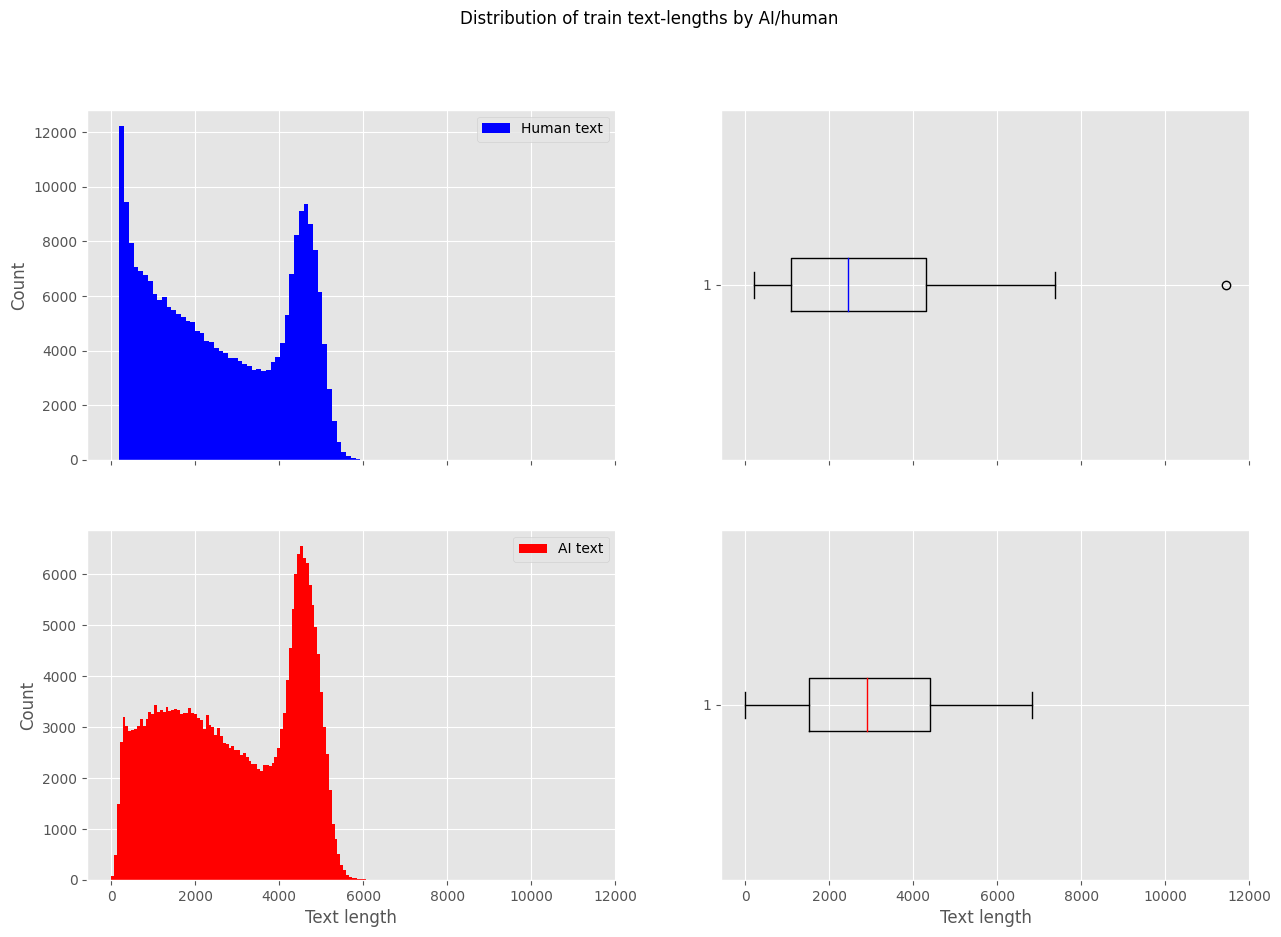

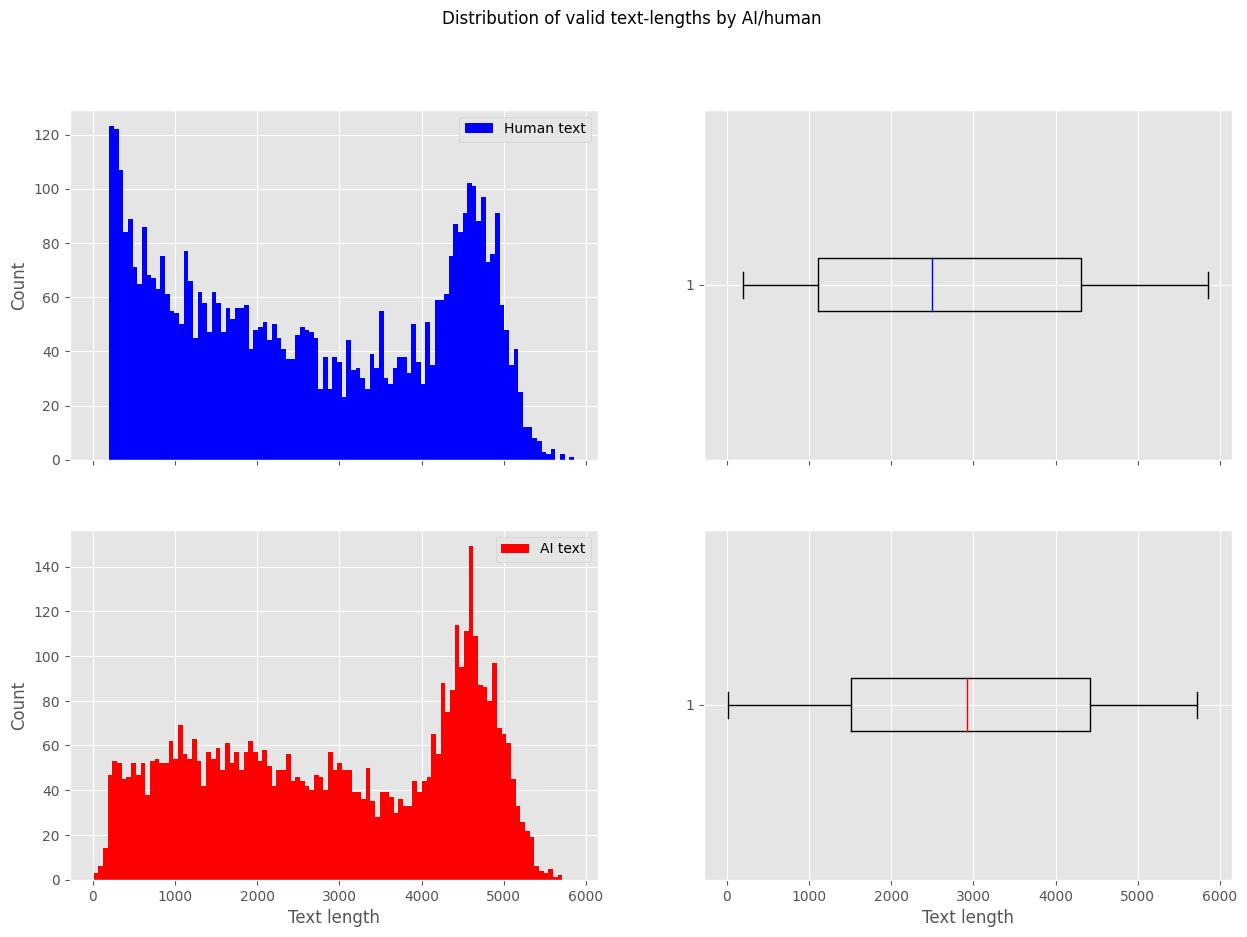

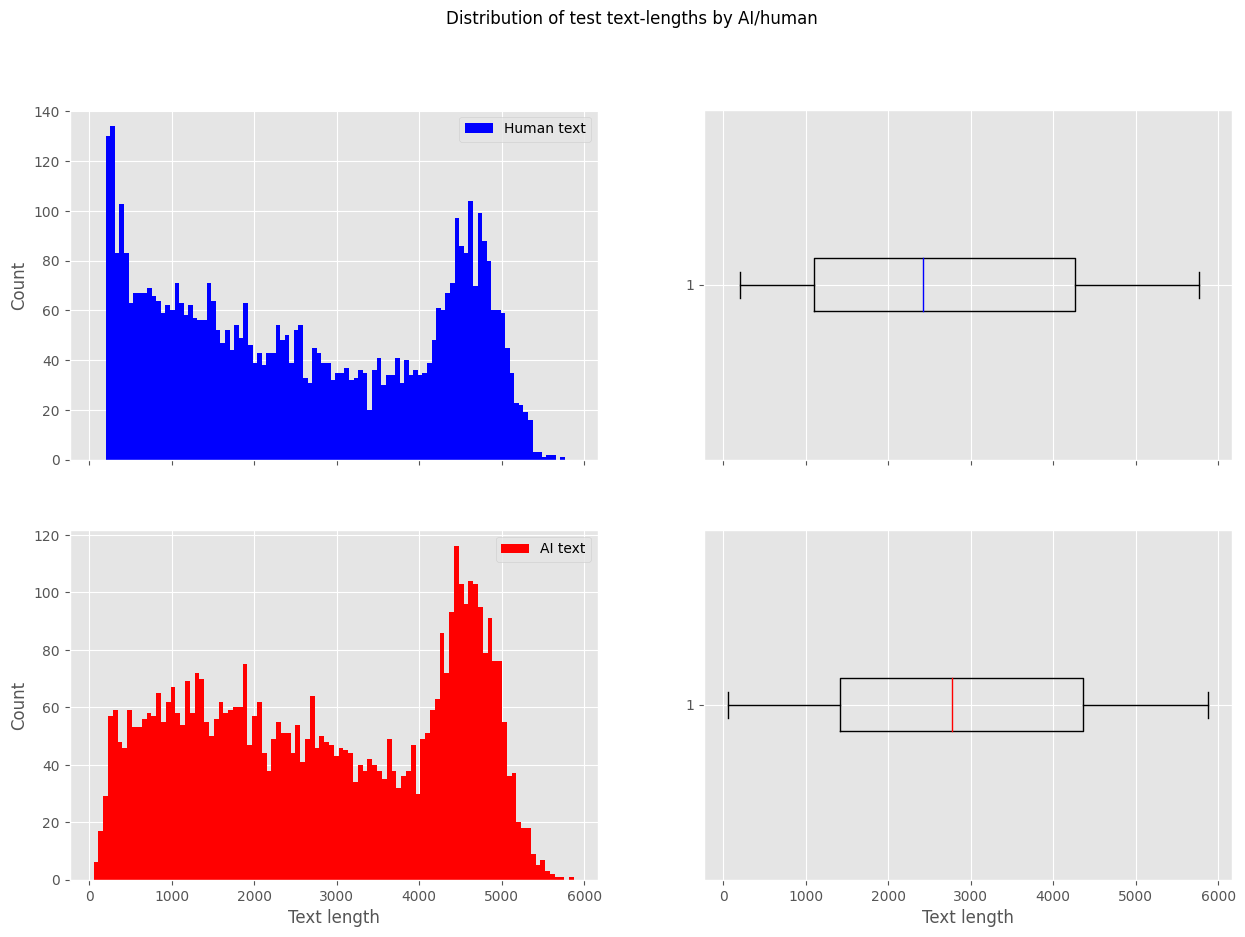

In [23]:
for df, name in zip([data_train, data_val, data_test], ["train", "valid", "test"]):
    plot_dist(df, name)